In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


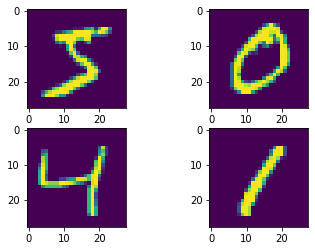

In [3]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0])

plt.subplot(222)
plt.imshow(x_train[1])

plt.subplot(223)
plt.imshow(x_train[2])

plt.subplot(224)
plt.imshow(x_train[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


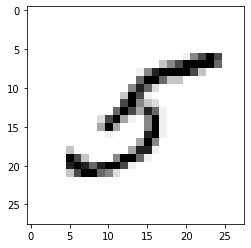

In [4]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

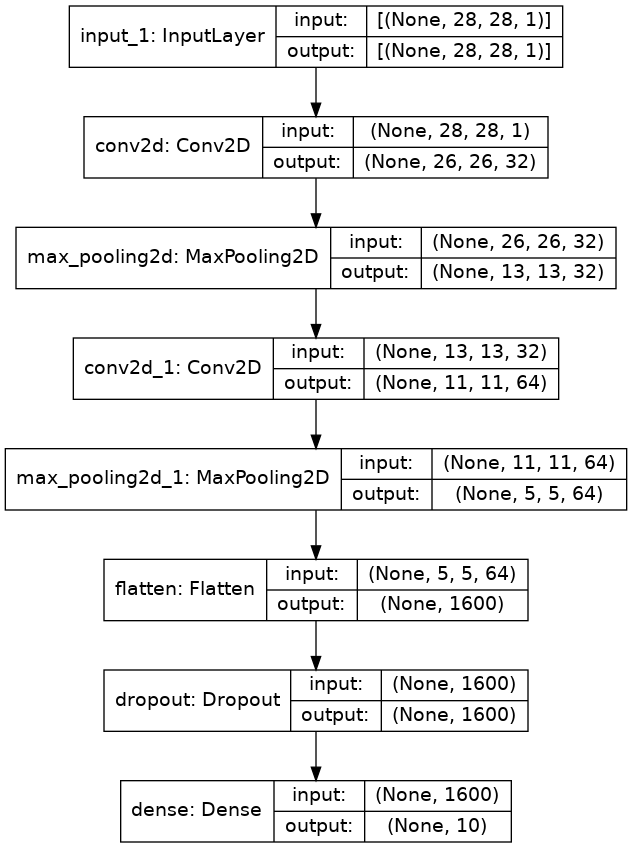

In [6]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 7ms/step - loss: 0.7826 - accuracy: 0.7536 - val_loss: 0.0850 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1222 - accuracy: 0.9630 - val_loss: 0.0586 - val_accuracy: 0.9827
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0461 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.0399 - val_accuracy: 0.9898
Epoch 5/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0604 - accuracy: 0.9809 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02432098612189293
Test accuracy: 0.9919000267982483


In [9]:
model.save('mnist_model.h5')

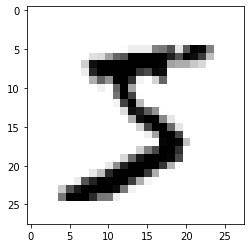

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()


In [11]:
from keras.models import load_model
model = load_model('mnist_model.h5')

In [12]:
predictions = model.predict([x_test])

In [13]:
print(predictions)

[[8.5688838e-11 4.5393502e-12 4.3680350e-07 ... 9.9999928e-01
  5.1829785e-10 9.3944500e-08]
 [8.5017058e-07 1.2018725e-06 9.9999630e-01 ... 3.9440473e-12
  4.8157477e-07 8.0941840e-13]
 [2.1465522e-07 9.9943179e-01 6.0013272e-06 ... 8.1148290e-05
  1.0754519e-05 1.0453681e-07]
 ...
 [1.2140324e-14 2.5470314e-12 1.6537432e-13 ... 5.0095783e-10
  2.6676057e-09 2.8238585e-09]
 [3.8059491e-07 5.5894888e-14 1.8716813e-09 ... 1.1966752e-12
  1.5918294e-04 8.2450242e-09]
 [4.3472429e-07 3.8365228e-13 1.3719721e-05 ... 1.3286040e-12
  1.7589166e-06 1.8528193e-10]]


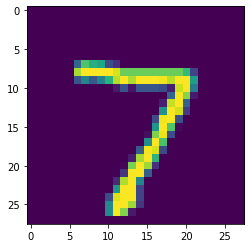

In [14]:
plt.imshow(x_test[0])
plt.show()

In [15]:
import numpy as np

print(np.argmax(predictions[0]))

7


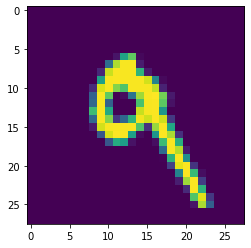

In [16]:
plt.imshow(x_test[7])
plt.show()

In [17]:
import numpy as np

print(np.argmax(predictions[7]))

9
